<a href="https://colab.research.google.com/github/Dennis-Farias/cursoIAeML/blob/main/FUZZY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
crises = ctrl.Antecedent(np.arange(0, 101, 1), 'crises')
saba = ctrl.Antecedent(np.arange(0, 101, 1), 'saba')
debito_expiratorio = ctrl.Antecedent(np.arange(0, 101, 1), 'debito_expiratorio')
gravidade = ctrl.Consequent(np.arange(0, 101, 1), 'gravidade')

In [4]:
crises.automf(names=['semanal', 'diario', 'continuo'])
saba.automf(names=['semanal', 'diario', 'continuo'])
debito_expiratorio.automf(names=['50-80', '33-55', 'menos_33'])
gravidade.automf(names=['moderada', 'aguda_grave', 'risco_vida'])

In [5]:
crises['semanal'] = fuzz.trapmf(crises.universe,[0,0,30,50])
crises['diario'] = fuzz.trapmf(crises.universe,[30,50,70,90])
crises['continuo'] = fuzz.trapmf(crises.universe,[80,90,100,100])

saba['semanal'] = fuzz.trapmf(saba.universe,[0,0,20,40])
saba['diario'] = fuzz.trapmf(saba.universe,[20,40,60,80])
saba['continuo'] = fuzz.trapmf(saba.universe,[80,90,100,100])

debito_expiratorio['50-80'] = fuzz.trapmf(debito_expiratorio.universe,[0,0,20,40])
debito_expiratorio['33-55'] = fuzz.trapmf(debito_expiratorio.universe,[20,40,60,80])
debito_expiratorio['menos_33'] = fuzz.trapmf(debito_expiratorio.universe,[80,90,100,100])

gravidade['moderada'] = fuzz.trimf(gravidade.universe,[0,30,60])
gravidade['aguda_grave'] = fuzz.trimf(gravidade.universe,[30,60,85])
gravidade['risco_vida'] = fuzz.trimf(gravidade.universe,[90,100,100])

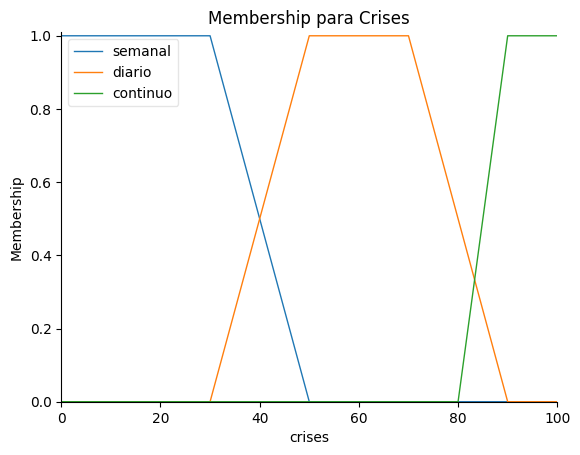

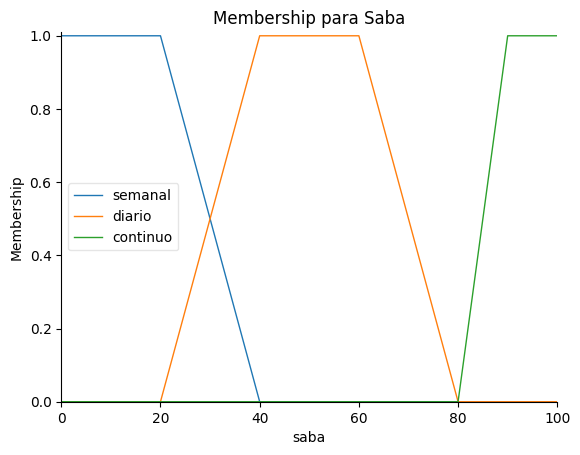

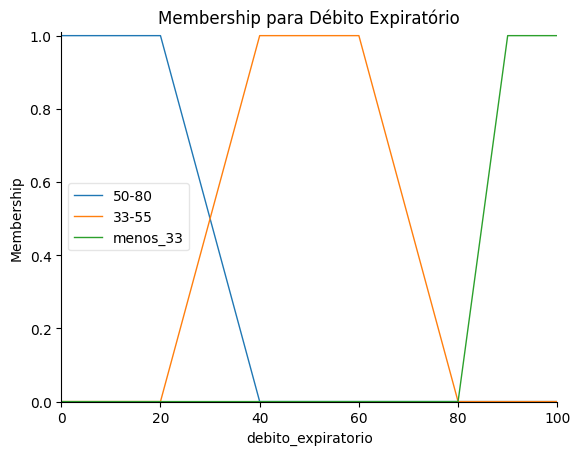

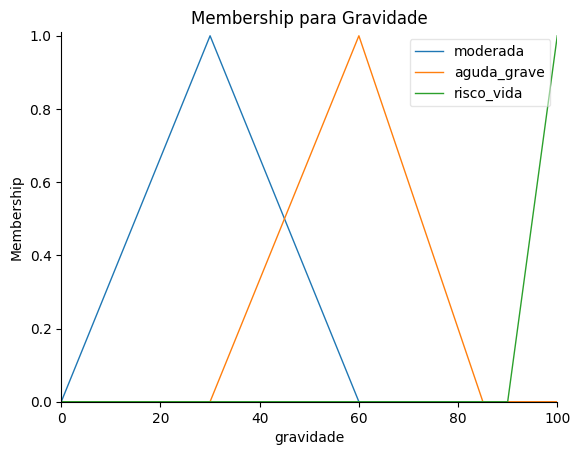

In [6]:
crises.view()
plt.title('Membership para Crises')
plt.show()

saba.view()
plt.title('Membership para Saba')
plt.show()

debito_expiratorio.view()
plt.title('Membership para Débito Expiratório')
plt.show()

gravidade.view()
plt.title('Membership para Gravidade')
plt.show()

In [7]:
rule1 = ctrl.Rule(crises['semanal'] | saba['semanal'] | debito_expiratorio['50-80'], gravidade['moderada'])
rule2 = ctrl.Rule(crises['diario'] | saba['diario'] | debito_expiratorio['33-55'], gravidade['aguda_grave'])
rule3 = ctrl.Rule(crises['continuo'] | saba['continuo'] | debito_expiratorio['menos_33'], gravidade['risco_vida'])

In [8]:
asthma_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
asthma = ctrl.ControlSystemSimulation(asthma_ctrl)

In [15]:
asthma.input['crises'] = 30
asthma.input['saba'] = 40
asthma.input['debito_expiratorio'] = 90

asthma.compute()

resultado_gravidade = asthma.output['gravidade']
print('Gravidade da Asma: ', resultado_gravidade)

if 0 <= resultado_gravidade < 60:
  print('Gravidade Moderada')
elif 60 <= resultado_gravidade < 90:
  print('Gravidade Aguda Grave')
else:
  print('Gravidade Risco de Vida')

Gravidade da Asma:  48.18181818181816
Gravidade Moderada
